In [2]:
#Manipulacion y Calculo de datos
import pandas as pd
import numpy as np
pd.options.display.max_columns
import scipy.stats as stats

# VIsualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

#Manejo de avisos de Warning
import warnings
warnings.filterwarnings('ignore')


# Prepocesamiento
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

>

>

# Transformación de Datos (Se usa solo el 40% de los datos)

Con el fin de optimizar el desempeño y despues de probar con procentajes diferentes de datos, minimizando la perdida de información, se decide trabajar con este porcentaje ya que a mostrado no bloquear el Kernel

In [3]:
dato40 = pd.read_excel("/content/drive/MyDrive/EAN/proyecto VIC/muestra_datos_4.xlsx")


dato40["presunto_agresor"].replace("HOMBRE","Hombre", inplace=True)
dato40["presunto_agresor"].replace("MUJER","Mujer", inplace=True)
dato40["presunto_agresor"].replace("YERNO","Yerno", inplace=True)
dato40["presunto_agresor"].replace("NUERA","Nuera", inplace=True)
dato40["presunto_agresor"].replace("Ex Amante","Ex amante", inplace=True)
dato40["presunto_agresor"].replace("Ex Esposo (a)","Ex esposo (a)", inplace=True)
dato40["presunto_agresor"].replace("Ex Novio (a)","Ex novio (a)", inplace=True)
dato40["presunto_agresor"].value_counts()

datos_tranformar = dato40.drop(columns=["grupo_de_edad_de_la_victima", "tipo_de_discapacidad",
                                       "código_dane_municipio", "codigo_dane_departamento",
                                       "días_de_incapacidad_medicolegal","pertenencia_etnica","localidad_del_hecho"])
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_data = encoder.fit_transform(datos_tranformar)
nombres_columnas = encoder.get_feature_names_out(datos_tranformar.columns)
df_encoded40 = pd.DataFrame(encoded_data, columns=nombres_columnas)

In [4]:
df_encoded40.head(3)

,ano_del_hecho_2016,ano_del_hecho_2017,ano_del_hecho_2018,ano_del_hecho_2019,ano_del_hecho_2020,ano_del_hecho_2021,ano_del_hecho_2022,ano_del_hecho_2023,sexo_de_la_victima_Mujer,grupo_mayor_menor_de_edad_b) Mayores de Edad (>18 años),...,presunto_agresor_Padrastro,presunto_agresor_Padre,presunto_agresor_Pareja o Expareja,presunto_agresor_Primo (a),presunto_agresor_Profesor (a),presunto_agresor_Sin información,presunto_agresor_Sobrino (a),presunto_agresor_Suegro (a),presunto_agresor_Tío (a),presunto_agresor_Yerno
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


>

>

>

>

## Muestreo de datos para visualizar Matriz de correlación

Debido a la complejidad por el volumen de los datos
y con el fin de ulustrar el proceso se toma una muestras
del 10% de los datos para crear una matriz de correlaciónes.

In [5]:
muestra_datos = df_encoded40.sample(frac=0.1)
muestra_datos.describe()

,ano_del_hecho_2016,ano_del_hecho_2017,ano_del_hecho_2018,ano_del_hecho_2019,ano_del_hecho_2020,ano_del_hecho_2021,ano_del_hecho_2022,ano_del_hecho_2023,sexo_de_la_victima_Mujer,grupo_mayor_menor_de_edad_b) Mayores de Edad (>18 años),...,presunto_agresor_Padrastro,presunto_agresor_Padre,presunto_agresor_Pareja o Expareja,presunto_agresor_Primo (a),presunto_agresor_Profesor (a),presunto_agresor_Sin información,presunto_agresor_Sobrino (a),presunto_agresor_Suegro (a),presunto_agresor_Tío (a),presunto_agresor_Yerno
count,24628.000000,24628.000000,24628.000000,24628.000000,24628.000000,24628.000000,24628.000000,24628.000000,24628.000000,24628.000000,...,24628.000000,24628.000000,24628.000000,24628.000000,24628.000000,24628.000000,24628.000000,24628.000000,24628.000000,24628.000000
mean,0.127781,0.128350,0.125995,0.125751,0.075808,0.084335,0.098506,0.113611,0.769287,0.863083,...,0.016445,0.048766,0.000406,0.014983,0.000244,0.004873,0.014008,0.005928,0.017135,0.007512
std,0.333853,0.334486,0.331850,0.331575,0.264696,0.277895,0.298003,0.317344,0.421298,0.343767,...,0.127181,0.215382,0.020147,0.121487,0.015607,0.069634,0.117528,0.076768,0.129777,0.086346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
correlation_matrix = muestra_datos.corr()

In [7]:
plt.figure(figsize=(100, 200))
sns.heatmap(correlation_matrix)
plt.title('Matriz de Correlación')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
df_encoded40.isna().sum()

,0
ano_del_hecho_2016,0
ano_del_hecho_2017,0
ano_del_hecho_2018,0
ano_del_hecho_2019,0
ano_del_hecho_2020,0
...,...
presunto_agresor_Sobrino (a),0
presunto_agresor_Suegro (a),0
presunto_agresor_Tío (a),0
presunto_agresor_Yerno,0


>

>

# Gráfico de Codo para establecer el numero ideal de Clusters

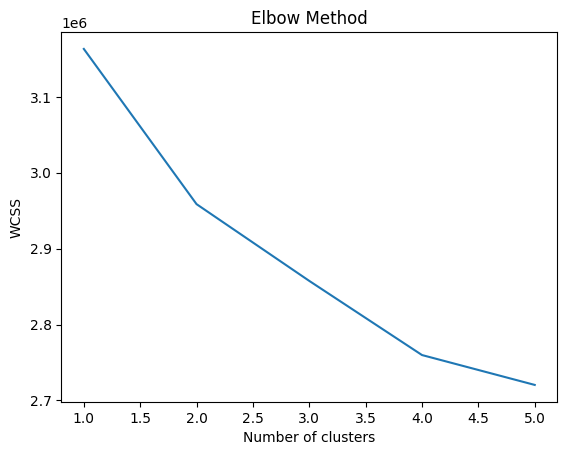

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_encoded40)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


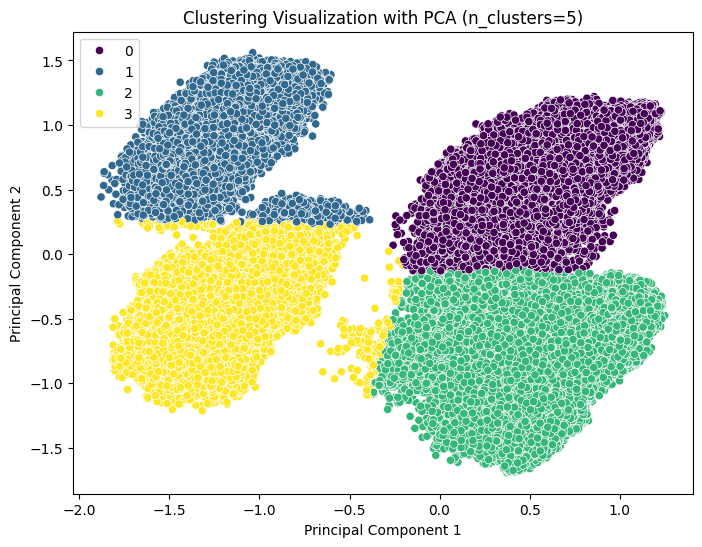

In [10]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_encoded40)

# Aplicacion de Kmeans para clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_result)
labels = kmeans.labels_

# Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette="viridis", legend='full')
plt.title('Clustering Visualization with PCA (n_clusters=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [11]:
# Aplicar KMeans con 5 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_encoded40)

# Agregar etiquetas de cluster al DataFrame
df_encoded40['cluster'] = kmeans.labels_

# Mostrar la distribución de los clusters
print(df_encoded40['cluster'].value_counts())

# Para identificar cada cluster, puedes analizar las características promedio de cada uno
for i in range(4):
    cluster_data = df_encoded40[df_encoded40['cluster'] == i]
    print(f"\nCluster {i}:")
    print(cluster_data.describe())


cluster
1    90980
2    66291
0    48440
3    40571
Name: count, dtype: int64

Cluster 0:
       ano_del_hecho_2016  ano_del_hecho_2017  ano_del_hecho_2018  \
count        48440.000000        48440.000000        48440.000000   
mean             0.121821            0.125434            0.127106   
std              0.327082            0.331213            0.333095   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       ano_del_hecho_2019  ano_del_hecho_2020  ano_del_hecho_2021  \
count        48440.000000        48440.000000        48440.000000   
mean             0.129232            0.082205            0.089616   
std              0.335460            0.274679            0.285634   
min         

# Distribución de los clusters
Cluster 0: 48,440 puntos.
Cluster 1: 90,980 puntos.
Cluster 2: 66,291 puntos.
Cluster 3: 40,571 puntos.

El Cluster 1 es el más grande, seguido por el Cluster 2, luego el Cluster 0, y finalmente el Cluster 3. Esto sugiere que los datos están distribuidos de manera desigual entre los clusters, lo cual puede ser normal dependiendo de la naturaleza de los datos y el algoritmo de clustering utilizado.

# Características principales por cluster

###Cluster 0

Año del hecho: Las proporciones de los años están bastante equilibradas, con un ligero aumento en 2019 (12.92%) y 2023 (10.30%).

Sexo de la víctima: El 64.43% de las víctimas son mujeres.

Grupo de edad: El 100% de los casos corresponden a mayores de edad (>18 años).

Presunto agresor: Los agresores más comunes son el padre (5.99%) y el tío (5.55%).

###Cluster 1

Año del hecho: Similar al Cluster 0, con proporciones equilibradas y un ligero aumento en 2023 (12.33%).

Sexo de la víctima: El 83.47% de las víctimas son mujeres.

Grupo de edad: El 98.78% de los casos corresponden a mayores de edad (>18 años).

Presunto agresor: No hay un agresor predominante, ya que la mayoría de los valores son cercanos a 0.

###Cluster 2

Año del hecho: Proporciones similares a los clusters anteriores, con un ligero aumento en 2016 (13.52%) y 2017 (13.72%).

Sexo de la víctima: El 90.15% de las víctimas son mujeres.

Grupo de edad: El 99.82% de los casos corresponden a mayores de edad (>18 años).

Presunto agresor: No hay un agresor predominante, con valores cercanos a 0.

###Cluster 3

Año del hecho: Proporciones equilibradas, con un ligero aumento en 2019 (13.69%) y 2023 (11.55%).

Sexo de la víctima: El 55.53% de las víctimas son mujeres.

Grupo de edad: Solo el 18.63% de los casos corresponden a mayores de edad (>18 años), lo que indica que este cluster está más asociado a menores de edad.

Presunto agresor: Los agresores más comunes son el padre (23.95%) y el tío (4.21%).

# Diferencias clave entre clusters

###Sexo de la víctima:

Los Clusters 1 y 2 tienen una proporción muy alta de víctimas mujeres (83.47% y 90.15%, respectivamente).

El Cluster 0 tiene una proporción moderada (64.43%).

El Cluster 3 tiene una proporción más equilibrada (55.53% mujeres).

###Grupo de edad:

Los Clusters 0, 1 y 2 están dominados por mayores de edad (>18 años).

El Cluster 3 tiene una proporción significativa de menores de edad (81.37%).

###Presunto agresor:

El Cluster 0 tiene una presencia notable de agresores como el padre y el tío.

El Cluster 3 tiene una presencia aún mayor del padre como agresor (23.95%).

Los Clusters 1 y 2 no muestran un agresor predominante.

# Observaciones adicionales
Año del hecho: No hay diferencias significativas en la distribución temporal entre los clusters, lo que sugiere que el tiempo no es un factor determinante en la formación de los clusters.

Agresores: Los agresores más comunes (padre y tío) están asociados principalmente con los Clusters 0 y 3, lo que podría indicar patrones específicos de violencia familiar en estos grupos.

Menores de edad: El Cluster 3 es el único que tiene una proporción significativa de menores de edad, lo que lo hace único en comparación con los otros clusters.

# Conclusiones
Los clusters parecen estar diferenciados principalmente por:

El sexo de la víctima (mujeres en su mayoría en los Clusters 1 y 2).

La edad de la víctima (menores de edad en el Cluster 3).

El tipo de agresor (padre y tío en los Clusters 0 y 3).

El Cluster 3 es particularmente interesante, ya que combina una alta proporción de menores de edad con agresores familiares (padre y tío), lo que podría indicar un patrón de violencia intrafamiliar dirigida a menores.

Los Clusters 1 y 2 están más asociados con víctimas mujeres mayores de edad, pero no muestran un agresor predominante, lo que sugiere que estos casos podrían estar relacionados con otro tipo de violencia (por ejemplo, violencia de género no familiar).